<a href="https://colab.research.google.com/github/ariquintal/machinelearning/blob/main/Predictor_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Indicadores_municipales_sabana_DA.csv', index_col=0, sep=',', encoding='latin-1')
df

,nom_ent,mun,clave_mun,nom_mun,pobtot_ajustada,pobreza,pobreza_e,pobreza_m,vul_car,vul_ing,...,pobreza_alim_10,pobreza_cap_90,pobreza_cap_00,pobreza_cap_10,pobreza_patrim_90,pobreza_patrim_00,pobreza_patrim_10,gini_90,gini_00,gini_10
ent,,,,,,,,,,,,,,,,,,,,,
1,Aguascalientes,1,1001,Aguascalientes,794304,30.531104,2.264478,28.266627,27.983320,8.419106,...,11.805700,20.4,12.7,18.474600,43.4,33.7,41.900398,0.473,0.425,0.422628
1,Aguascalientes,2,1002,Asientos,48592,67.111172,8.040704,59.070468,22.439389,5.557604,...,21.993299,39.9,29.0,30.980801,64.2,48.9,59.175800,0.379,0.533,0.343879
1,Aguascalientes,3,1003,Calvillo,53104,61.360527,7.241238,54.119289,29.428583,2.921336,...,19.266800,39.5,33.1,28.259199,63.9,57.9,56.504902,0.414,0.465,0.386781
1,Aguascalientes,4,1004,Cosío,14101,52.800458,4.769001,48.031458,27.128568,7.709276,...,14.303200,35.2,21.0,22.386101,59.7,40.1,51.164501,0.392,0.541,0.344984
1,Aguascalientes,5,1005,Jesús María,101379,45.338512,6.084037,39.254475,26.262912,8.279864,...,15.085100,36.6,22.6,22.139999,60.6,42.2,45.703899,0.391,0.469,0.458083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,Zacatecas,54,32054,Villa Hidalgo,21016,74.848837,12.301183,62.547654,19.229856,3.177689,...,30.055300,51.8,54.8,41.368999,73.5,70.9,70.859596,0.403,0.589,0.342037
32,Zacatecas,55,32055,Villanueva,27385,65.450191,10.203506,55.246687,23.623556,5.007426,...,13.138800,34.2,25.9,20.563601,57.8,44.1,46.659199,0.422,0.463,0.362527
32,Zacatecas,56,32056,Zacatecas,117528,29.541959,3.535624,26.006335,16.644262,8.828019,...,7.164800,15.7,20.7,12.115300,36.6,41.8,32.302700,0.528,0.498,0.436339


In [ ]:
missing_data_per_column = df.isnull().sum()

#Total
total_missing = df.isnull().sum().sum()
print('\nTotal of null data in the dataset:', total_missing)


Total of null data in the dataset: 305


In [ ]:
#Columns
columns_with_missing_data = missing_data_per_column[missing_data_per_column > 0].count()

print('Number of columns with null data:', columns_with_missing_data)

Number of columns with null data: 56


In [ ]:
#Categorical to binary
df = pd.get_dummies(df, columns=['gdo_rezsoc00','gdo_rezsoc05', 'gdo_rezsoc10'])

In [ ]:
df

,nom_ent,mun,clave_mun,nom_mun,pobtot_ajustada,pobreza,pobreza_e,pobreza_m,vul_car,vul_ing,...,gdo_rezsoc05_Alto,gdo_rezsoc05_Bajo,gdo_rezsoc05_Medio,gdo_rezsoc05_Muy alto,gdo_rezsoc05_Muy bajo,gdo_rezsoc10_Alto,gdo_rezsoc10_Bajo,gdo_rezsoc10_Medio,gdo_rezsoc10_Muy alto,gdo_rezsoc10_Muy bajo
ent,,,,,,,,,,,,,,,,,,,,,
1,Aguascalientes,1,1001,Aguascalientes,794304,30.531104,2.264478,28.266627,27.983320,8.419106,...,0,0,0,0,1,0,0,0,0,1
1,Aguascalientes,2,1002,Asientos,48592,67.111172,8.040704,59.070468,22.439389,5.557604,...,0,0,0,0,1,0,0,0,0,1
1,Aguascalientes,3,1003,Calvillo,53104,61.360527,7.241238,54.119289,29.428583,2.921336,...,0,0,0,0,1,0,0,0,0,1
1,Aguascalientes,4,1004,Cosío,14101,52.800458,4.769001,48.031458,27.128568,7.709276,...,0,0,0,0,1,0,0,0,0,1
1,Aguascalientes,5,1005,Jesús María,101379,45.338512,6.084037,39.254475,26.262912,8.279864,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,Zacatecas,54,32054,Villa Hidalgo,21016,74.848837,12.301183,62.547654,19.229856,3.177689,...,0,1,0,0,0,0,1,0,0,0
32,Zacatecas,55,32055,Villanueva,27385,65.450191,10.203506,55.246687,23.623556,5.007426,...,0,0,0,0,1,0,0,0,0,1
32,Zacatecas,56,32056,Zacatecas,117528,29.541959,3.535624,26.006335,16.644262,8.828019,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
grouped_subsets = {group: group_df for group, group_df in df.groupby('nom_ent')}

# Calculate mean per group for numeric columns
numeric_columns = df.select_dtypes(include=np.number).columns
df[numeric_columns] = df.groupby('nom_ent')[numeric_columns].transform(lambda x: x.fillna(x.mean()))



In [ ]:
missing_data_per_column = df.isnull().sum()

#Count total null data again to verify
total_missing = df.isnull().sum().sum()
print('\nTotal null data in the data set:', total_missing)


Total null data in the data set: 0


<ipython-input-11-8c0f2a129c5a>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()[[feature_deseado]]


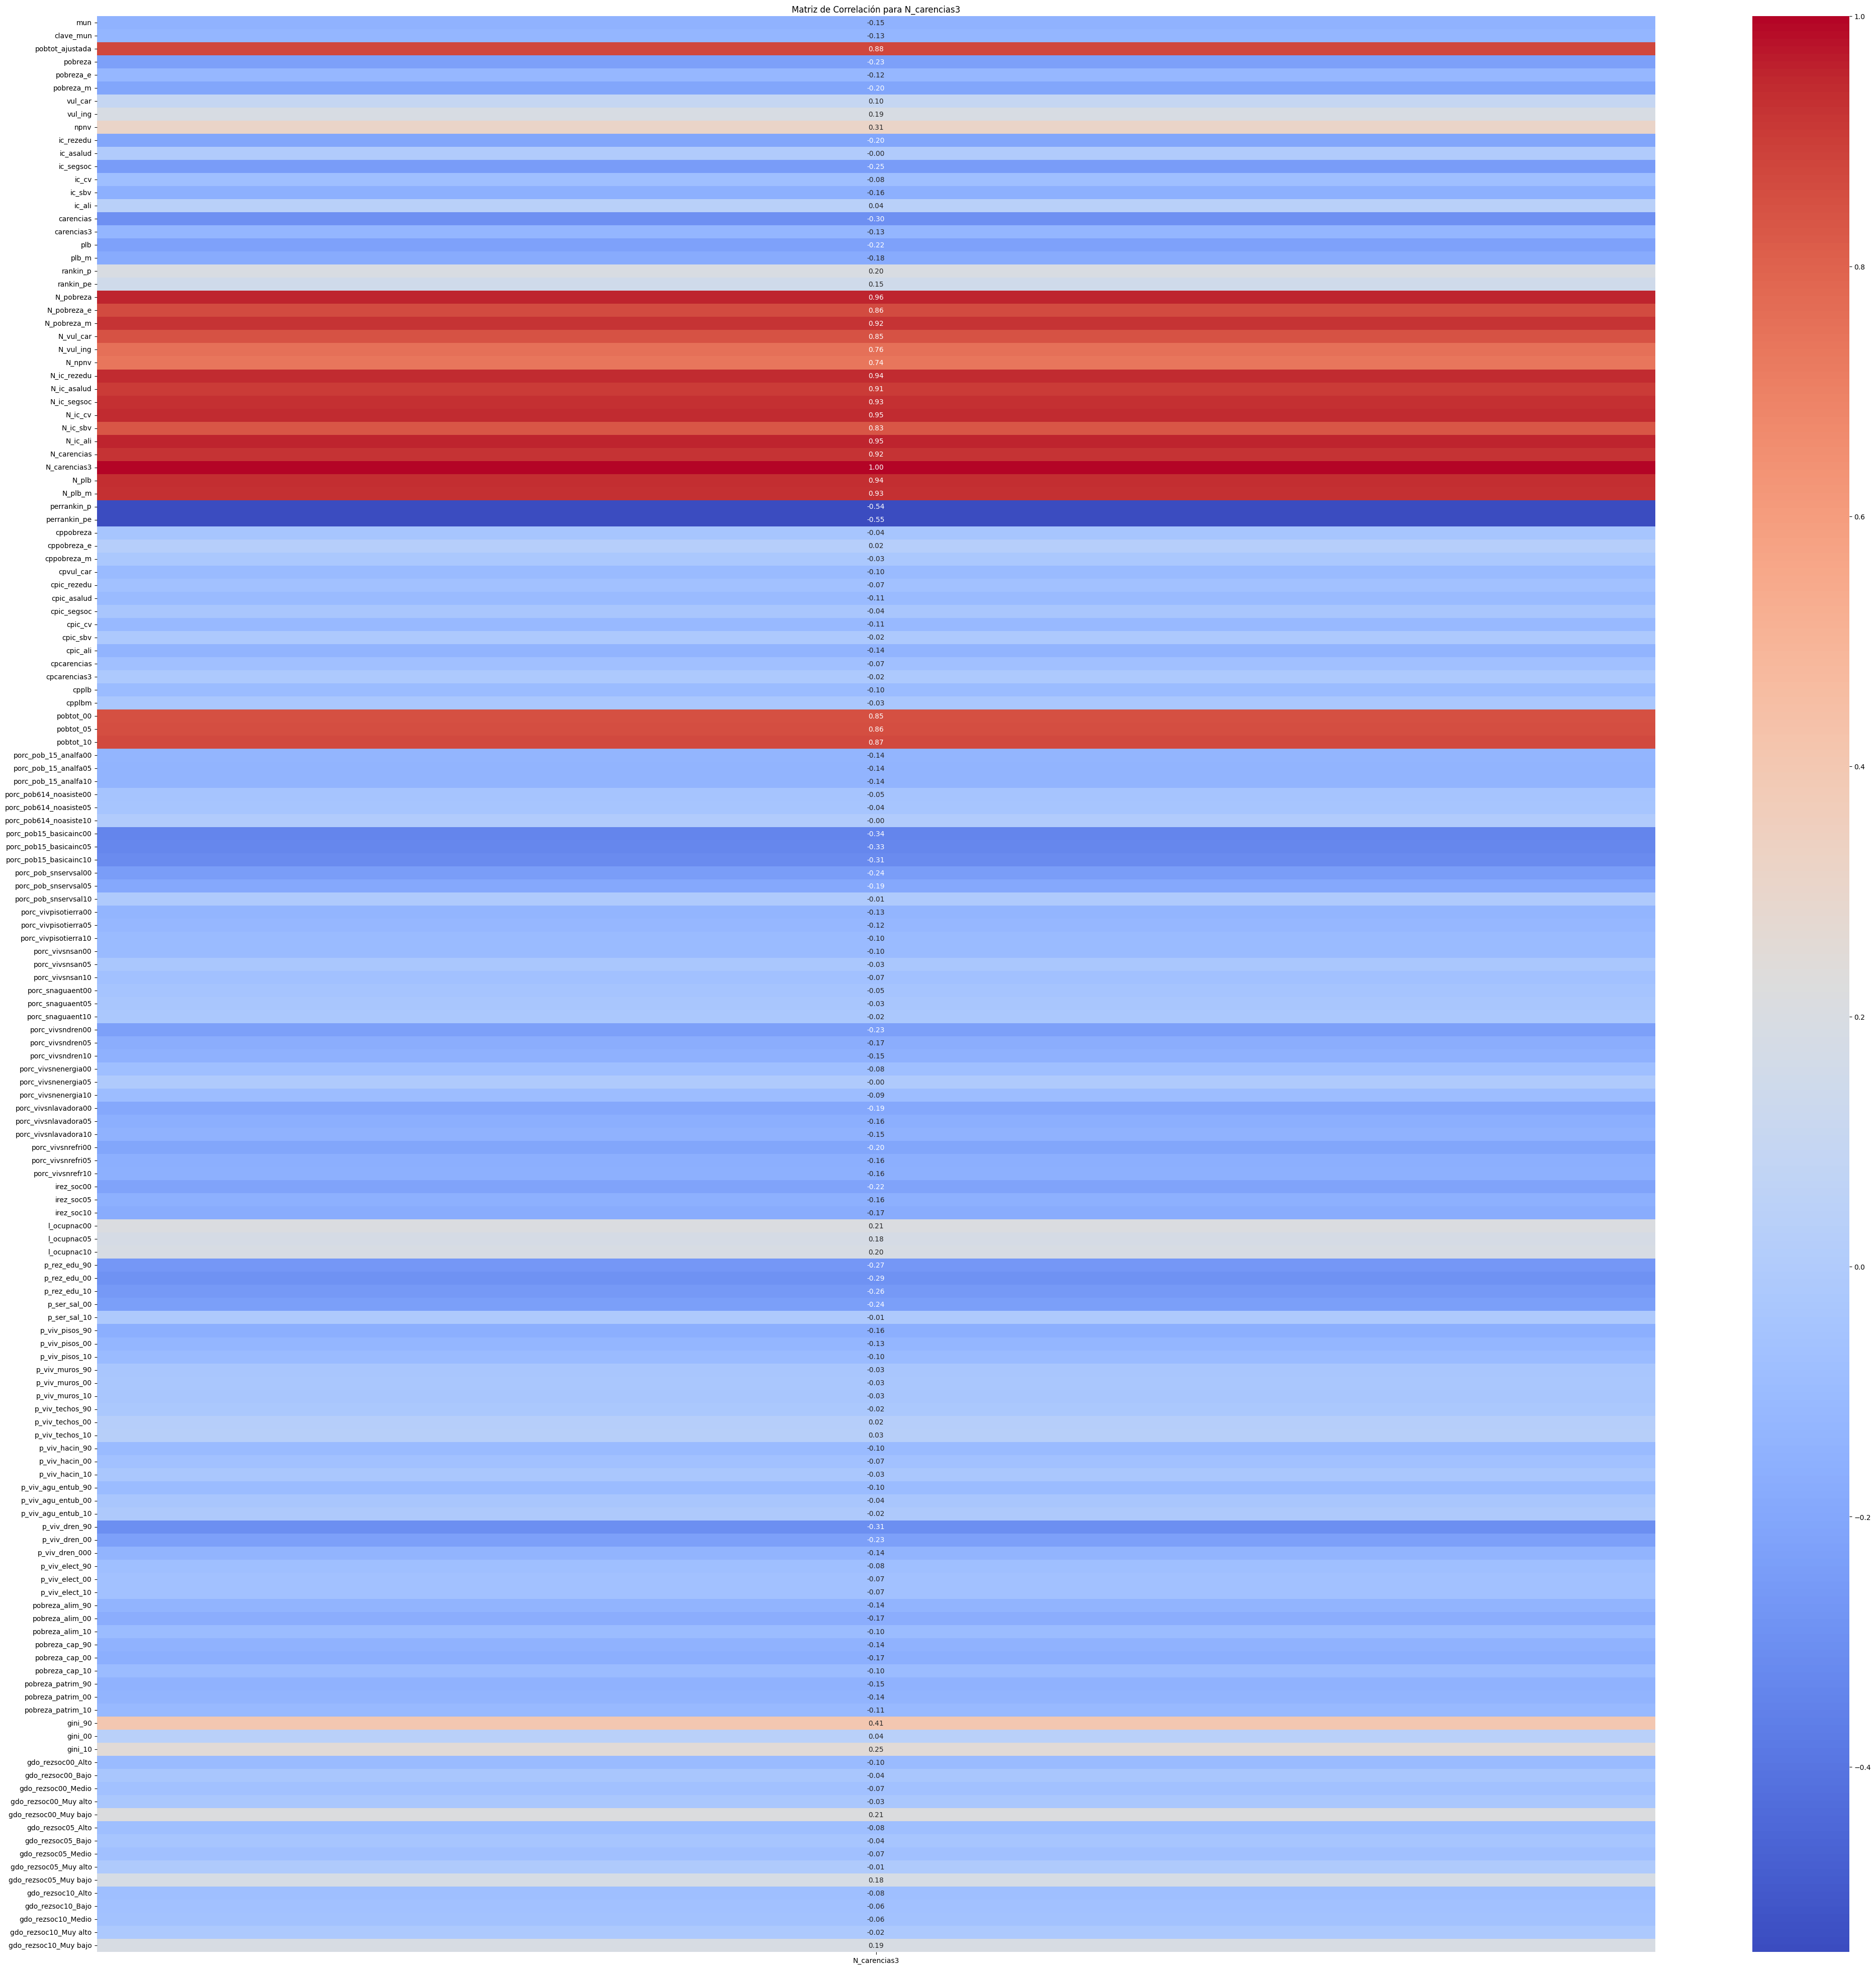

In [ ]:
# Seleccionar el feature deseado y los demás features
feature_deseado = 'N_carencias3'

# Calculate the correlation matrix between the desired feature and the other features.
correlation_matrix = df.corr()[[feature_deseado]]

#Correlation matrix using a heatmap
plt.figure(figsize=(50, 50))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Matriz de Correlación para ' + feature_deseado)
plt.show()

In [ ]:
#Outliers

numeric_columns = df.select_dtypes(include=np.number).columns

# Calculate the interquartile range for each numerical column
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers
outliers = (df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))

# Deleting outliers
df = df[~outliers.any(axis=1)]


In [ ]:
#Regression Model

# Selecting the target variable and features
target_variable = 'N_carencias3'
features = ['pobtot_ajustada', 'N_pobreza', 'N_pobreza_e','N_pobreza_m','N_vul_car','N_vul_ing','N_npnv','N_ic_rezedu','N_ic_asalud','N_ic_segsoc','N_ic_cv','N_ic_sbv','N_ic_ali','N_carencias','N_plb','N_plb_m','pobtot_00','pobtot_05','pobtot_10']

# Create the feature dataset (X) and the target variable (y)
X = df[features].values
y = df[target_variable].values

# Split data (80% train, 20% test)
split_ratio = 0.8
split_index = int(len(X) * split_ratio)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Train the linear regression model
X_train_transposed = X_train.T
X_train_transposed_with_bias = np.vstack([X_train_transposed, np.ones(len(X_train))]).T

# Calculate the coefficients
coefficients = np.linalg.inv(X_train_transposed_with_bias.T.dot(X_train_transposed_with_bias)).dot(X_train_transposed_with_bias.T).dot(y_train)

# Make predictions on the test set
X_test_with_bias = np.vstack([X_test.T, np.ones(len(X_test))]).T
y_pred = X_test_with_bias.dot(coefficients)

# Calculate mean square error
mse = np.mean((y_test - y_pred) ** 2)

# Calculate the Coefficient of Determination
y_mean = np.mean(y_test)
sst = np.sum((y_test - y_mean) ** 2)
ssr = np.sum((y_test - y_pred) ** 2)
r2 = 1 - (ssr / sst)

print('Mean Squared Error (MSE):', mse)
print('Coefficient of Determination (R^2):', r2)

Mean Squared Error (MSE): 42684.8245298849
Coefficient of Determination (R^2): 0.9946389850797205


In [ ]:
#Predictions
for i in range(len(y_test)):
    print(f'Real Value: {y_test[i]}, Prediction: {y_pred[i]}')

Real Value: 835, Prediction: 947.4554866990816
Real Value: 316, Prediction: 336.52566857731426
Real Value: 272, Prediction: 278.36523201821115
Real Value: 244, Prediction: 264.87948518121624
Real Value: 1192, Prediction: 1154.7661543971608
Real Value: 177, Prediction: 165.26558723240186
Real Value: 10957, Prediction: 11565.8464783556
Real Value: 4393, Prediction: 4709.139013920988
Real Value: 2207, Prediction: 2328.4272603373906
Real Value: 3401, Prediction: 3484.1173428748857
Real Value: 1464, Prediction: 1433.2098351268419
Real Value: 3383, Prediction: 3728.1462762043275
Real Value: 3505, Prediction: 3563.961995139641
Real Value: 928, Prediction: 1022.4525381680264
Real Value: 6286, Prediction: 6802.182321812817
Real Value: 3123, Prediction: 3377.4576224078787
Real Value: 1197, Prediction: 1230.3532521184593
Real Value: 2718, Prediction: 2758.0211128756414
Real Value: 3289, Prediction: 3388.3502317509538
Real Value: 5872, Prediction: 6203.956668322304
Real Value: 1217, Prediction: 11

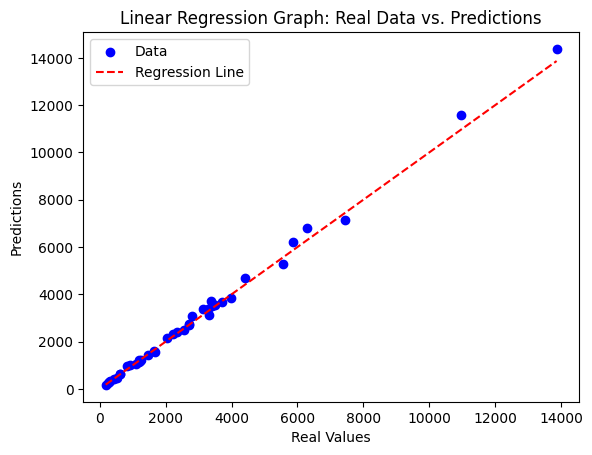

In [ ]:
# Graphic Lineal Regression
plt.scatter(y_test, y_pred, color='blue', label='Data')


plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Regression Line')
plt.xlabel('Real Values')
plt.ylabel('Predictions')
plt.title('Linear Regression Graph: Real Data vs. Predictions')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Selecting the target variable and features
target_variable = 'N_carencias3'
features = ['pobtot_ajustada', 'N_pobreza', 'N_pobreza_e','N_pobreza_m','N_vul_car','N_vul_ing','N_npnv','N_ic_rezedu','N_ic_asalud','N_ic_segsoc','N_ic_cv','N_ic_sbv','N_ic_ali','N_carencias','N_plb','N_plb_m','pobtot_00','pobtot_05','pobtot_10']


# Create the feature dataset (X) and the target variable (y)
X = df[features].values
y = df[target_variable].values

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error (MSE):', mse)
print('Coeficiente de determinación (R^2):', r2)



Mean Squared Error (MSE): 22632.966946931243
Coeficiente de determinación (R^2): 0.9948380283791678


In [ ]:
# Predictions
for i in range(len(y_test)):
    print(f'Valor Real: {y_test[i]}, Predicción: {y_pred[i]}')

Valor Real: 602, Predicción: 565.541161988937
Valor Real: 3798, Predicción: 3842.5575265596144
Valor Real: 262, Predicción: 300.2902023230766
Valor Real: 510, Predicción: 554.6230196652701
Valor Real: 477, Predicción: 437.68118100165844
Valor Real: 2165, Predicción: 2289.5691652989335
Valor Real: 3582, Predicción: 3787.5460392229243
Valor Real: 2217, Predicción: 2155.0454065152844
Valor Real: 692, Predicción: 623.3026940088619
Valor Real: 3401, Predicción: 3425.7239796005115
Valor Real: 835, Predicción: 922.9772331671659
Valor Real: 596, Predicción: 620.7651251864022
Valor Real: 6950, Predicción: 7576.482319578389
Valor Real: 4335, Predicción: 4158.461743406528
Valor Real: 9333, Predicción: 9475.039814177086
Valor Real: 2979, Predicción: 2938.2111806438124
Valor Real: 1145, Predicción: 1103.0462517037581
Valor Real: 5671, Predicción: 5334.860450809281
Valor Real: 383, Predicción: 407.9471096453957
Valor Real: 3131, Predicción: 3320.067309335939
Valor Real: 1880, Predicción: 1827.296229

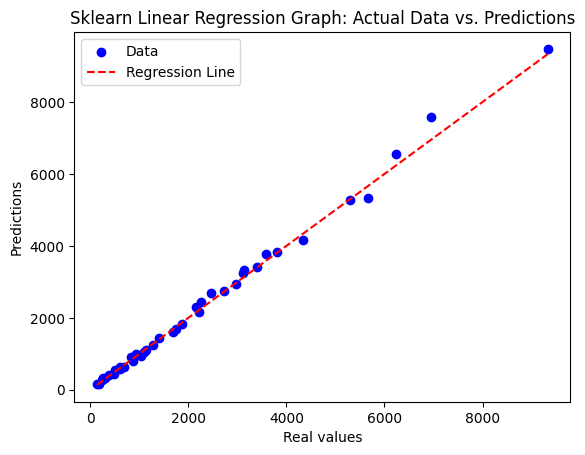

In [ ]:
# Graphic
plt.scatter(y_test, y_pred, color='blue', label='Data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Regression Line')
plt.xlabel('Real values')
plt.ylabel('Predictions')
plt.title('Sklearn Linear Regression Graph: Actual Data vs. Predictions')
plt.legend()
plt.show()

In [ ]:
!jupyter nbconvert --to html Predictor.ipynb

[NbConvertApp] Converting notebook Predictor.ipynb to html
[NbConvertApp] Writing 1386164 bytes to Predictor.html
